<a href="https://colab.research.google.com/github/wonjae11/AI_TEST/blob/main/04_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 04. 자동미분

In [ ]:
import torch

### 4-1. requires_grad

In [ ]:
x = torch.rand(3, requires_grad=True)
print(x)
print(x.grad)
print(x.grad_fn)
print(x.requires_grad)

tensor([0.9523, 0.0217, 0.9637], requires_grad=True)
None
None
True


In [ ]:
y = 2 * x
print(y)
print(y.grad)
print(y.grad_fn)
print(y.requires_grad)

tensor([1.9045, 0.0435, 1.9274], grad_fn=<MulBackward0>)
None
True


<ipython-input-7-9c3e4a13d414>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(y.grad)


In [ ]:
z = y ** 2
print(z)
print(z.grad)
print(z.grad_fn)
print(z.requires_grad)

tensor([3.6271e+00, 1.8881e-03, 3.7148e+00], grad_fn=<PowBackward0>)
None
True


<ipython-input-8-3f89fad9a690>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(z.grad)


### 4-2. Backward()
- x -> y -> z 계산에서 역전파를 통해 기울기를 구함

In [ ]:
result = z.sum()
result.backward()

In [ ]:
print(z)
print(x.grad)

tensor([3.6271e+00, 1.8881e-03, 3.7148e+00], grad_fn=<PowBackward0>)
tensor([7.6180, 0.1738, 7.7095])


### 4-3. no_grad()
- 역전파를 중지

In [ ]:
x = torch.tensor(1.0, requires_grad=True)
print(x.requires_grad)
# print((x ** 2).requires_grad)

with torch.no_grad():
  y = x ** 2
  print(x.requires_grad)
  print(y.requires_grad)

True
True
False


### 4-4. detach()

In [ ]:
y.detach()

tensor(1.)

### 실습1. 선형 회귀 실습

Epoch [50/1000], Loss: 4.5001
Epoch [100/1000], Loss: 4.4372
Epoch [150/1000], Loss: 4.3990
Epoch [200/1000], Loss: 4.3758
Epoch [250/1000], Loss: 4.3616
Epoch [300/1000], Loss: 4.3530
Epoch [350/1000], Loss: 4.3478
Epoch [400/1000], Loss: 4.3446
Epoch [450/1000], Loss: 4.3427
Epoch [500/1000], Loss: 4.3415
Epoch [550/1000], Loss: 4.3408
Epoch [600/1000], Loss: 4.3404
Epoch [650/1000], Loss: 4.3401
Epoch [700/1000], Loss: 4.3400
Epoch [750/1000], Loss: 4.3399
Epoch [800/1000], Loss: 4.3398
Epoch [850/1000], Loss: 4.3398
Epoch [900/1000], Loss: 4.3398
Epoch [950/1000], Loss: 4.3397
Epoch [1000/1000], Loss: 4.3397


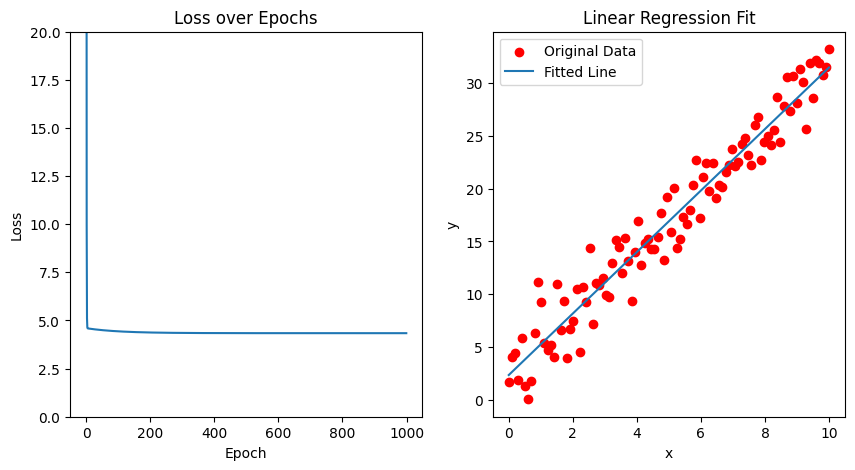

In [ ]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. 입출력 정의
x = torch.linspace(0, 10, 100).view(-1, 1)
y = 3 * x + 2 + torch.randn(100, 1) * 2

# 2. 모델 만들기
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
    return self.linear(x)

model = LinearRegressionModel()

# 3. 손실함수 정의
# 손실함수 선택
loss_function = nn.MSELoss()

# 4. 가중치 업데이트
# 경사하강법 -> 어떤 것을 사용할지 선택
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 5. 학습 반복
epochs = 1000
losses = []

for epoch in range(epochs):
  optimizer.zero_grad() # 기울기 초기화
  outputs = model(x) # 예측값 계산
  loss = loss_function(outputs, y) # 손실 계산
  loss.backward() # 역전파
  optimizer.step() # 가중치 업데이트

  losses.append(loss.item()) # 손실값 저장

  if (epoch + 1) % 50 == 0:
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')


# 6. 결과 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(losses, label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 20)

# 데이터와 예측 결과 시각화
plt.subplot(1,2,2)
plt.scatter(x.numpy(), y.numpy(), color = 'red', label='Original Data')
plt.plot(x.numpy(), model(x).detach().numpy(), label='Fitted Line')
plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 최종 모델 파라미터 확인
print("Model parameters")
for name, param in model.named_parameters():
  print(f"{name}: {param.data}")


### 실습2. 다중 선형 회귀 구현

Epoch [100/1000], Loss: 2.6159
Epoch [200/1000], Loss: 2.4754
Epoch [300/1000], Loss: 2.3816
Epoch [400/1000], Loss: 2.3072
Epoch [500/1000], Loss: 2.2480
Epoch [600/1000], Loss: 2.2007
Epoch [700/1000], Loss: 2.1630
Epoch [800/1000], Loss: 2.1328
Epoch [900/1000], Loss: 2.1085
Epoch [1000/1000], Loss: 2.0889
학습된 모델의 파라미터:
Weights: tensor([[ 0.2061,  0.4580, -0.0474]])
Bias: tensor([0.5714])


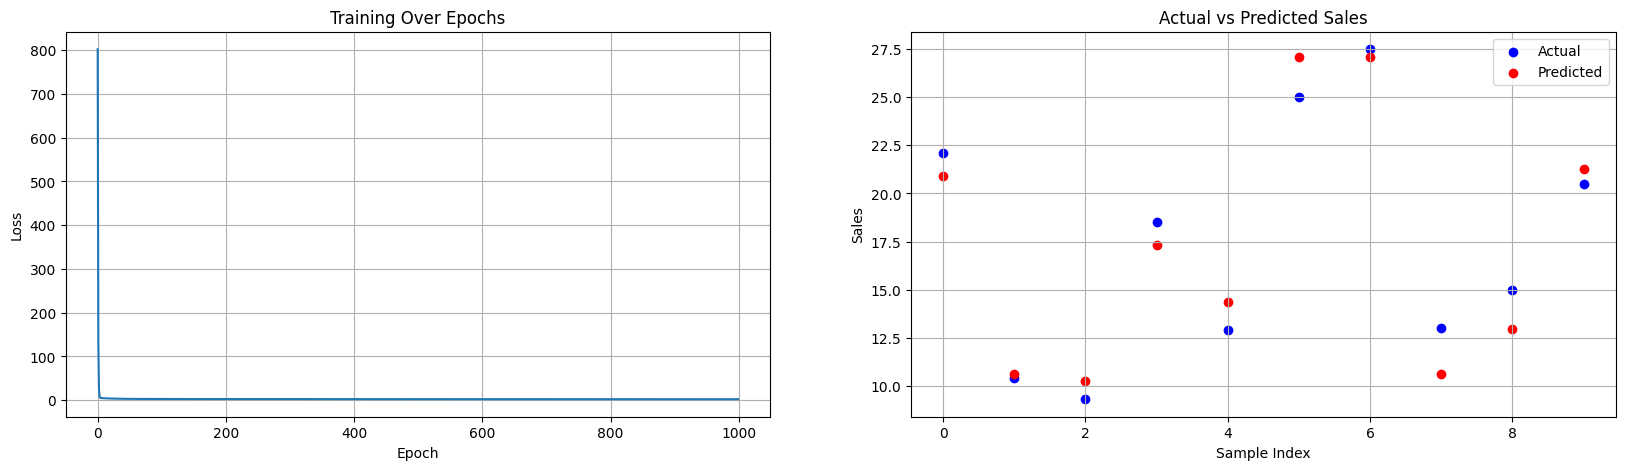

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 실습1. 입출력 데이터
x = torch.tensor([[50.0, 25.0, 30.0],
                [10.0, 20.0, 25.0],
                [5.0, 22.0, 30.0],
                [30.0, 26.0, 28.0],
                [40.0, 15.0, 28.0],
                [60.0, 35.0, 40.0],
                [70.0, 30.0, 35.0],
                [20.0, 15.0, 20.0],
                [25.0, 18.0, 22.0],
                [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9],
                [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)

# 2. 모델 정의
class MultiLinearRegression(nn.Module):
  def __init__(self):
    super(MultiLinearRegression, self).__init__()
    self.linear = nn.Linear(3, 1)

  def forward(self, x):
    return self.linear(x)

model = MultiLinearRegression()

# 3. 손실함수 설정과 가중치 업데이트
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
epochs = 1000
losses = []

# 4. 결과 분석
for epoch in range(epochs):
  optimizer.zero_grad()
  outputs = model(x)
  loss = loss_function(outputs, y)
  loss.backward()
  optimizer.step()

  losses.append(loss.item())

  if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

weights = model.linear.weight.data
bias = model.linear.bias.data
print("학습된 모델의 파라미터:")
print(f"Weights: {weights}")
print(f"Bias: {bias}")

# 5. 시각화
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.plot(losses, label='Loss')
plt.title('Training Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
# plt.ylim(0, 60)

plt.subplot(1, 2, 2)
plt.scatter(range(len(y)), y.numpy(), color='blue', label='Actual')
plt.scatter(range(len(y)), model(x).detach().numpy(), color='red', label='Predicted')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

### 실습3. 로지스틱 회귀 구현

Epoch [100/1000], Loss: 0.4565
Epoch [200/1000], Loss: 0.3528
Epoch [300/1000], Loss: 0.3036
Epoch [400/1000], Loss: 0.2755
Epoch [500/1000], Loss: 0.2574
Epoch [600/1000], Loss: 0.2449
Epoch [700/1000], Loss: 0.2359
Epoch [800/1000], Loss: 0.2290
Epoch [900/1000], Loss: 0.2236
Epoch [1000/1000], Loss: 0.2193


Text(0, 0.5, 'Class 2')

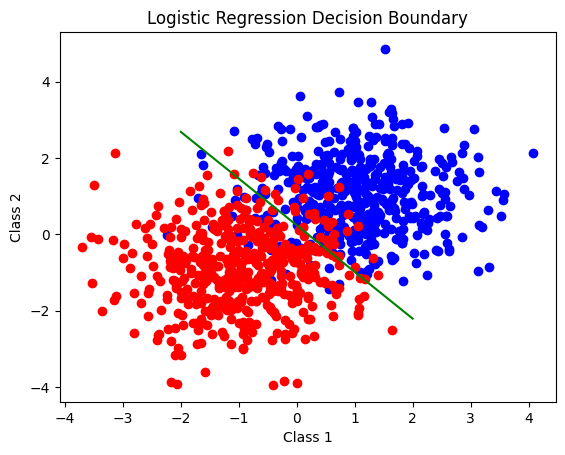

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 정의
np.random.seed(42)
num_samples = 500

# 1-1. class 1 데이터 생성
mean_1 = np.array([1.0, 1.0])
cov_1 = np.array([[1, 0], [0, 1]])
data_1 = np.random.multivariate_normal(mean_1, cov_1, num_samples)

# 1-2. class 0 데이터 생성
mean_2 = np.array([-1.0, -1.0])
cov_2 = np.array([[1, 0], [0, 1]])
data_2 = np.random.multivariate_normal(mean_2, cov_2, num_samples)

# 데이터 병합
data = np.vstack((data_1, data_2))
data = torch.from_numpy(data).float()  # float32로 변환

# 레이블 생성
labels = np.ones(num_samples * 2)
labels[num_samples:] = 0
labels = torch.from_numpy(labels).view(-1, 1).float()  # float32로 변환

# 2. 모델 정의
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out)  # 시그모이드 활성화 함수
        return out

model = LogisticRegression(2, 1)

# 3. 손실 함수와 최적화 알고리즘 설정
loss_fn = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 1000
losses = []

# 4. 학습 반복
for epoch in range(epochs):
    optimizer.zero_grad()  # 기울기 초기화
    outputs = model(data)  # 모델 예측값
    loss = loss_fn(outputs, labels)  # 손실 계산
    loss.backward()  # 역전파
    optimizer.step()  # 가중치 업데이트

    losses.append(loss.item())  # 손실값 기록

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# 5. 결과 시각화
w = model.linear.weight.data.numpy()
b = model.linear.bias.data.numpy()

x_plot = np.array([-2, 2])
y_plot = -b - w[0, 0] * x_plot / w[0, 1]
plt.plot(x_plot, y_plot, color='g', label='Decision boundary')
plt.scatter(data[:num_samples, 0], data[:num_samples, 1], color='b', label='Class 1')
plt.scatter(data[num_samples:, 0], data[num_samples:, 1], color='r', label='Class 0')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Class 1')
plt.ylabel('Class 2')

### 실습4. FashionMNIST 신경망 구현

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"
# print(device)

# 1. 데이터 입출력 정의
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# 2. 모델 정의
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(28*28, 512), # 입력층
      nn.BatchNorm1d(512),
      nn.ReLU(),
      nn.Linear(512, 256), # Layer 1
      nn.BatchNorm1d(256),
      nn.ReLU(),
      nn.Linear(256, 64), # Layer 2
      nn.BatchNorm1d(64),
      nn.ReLU(),
      nn.Linear(64, 10), # 출력층
    ) # [0.2, 2.1, 1.5, 0.4, ......]

  def forward(self, x):
    out = self.flatten(x)
    out = self.linear_relu_stack(out)
    return out

model = NeuralNetwork()
model.to(device) # GPU적용

# 3. 손실함수 정의
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss = loss.item()
      current = batch * len(X)
      print(f"loss: {loss: .4f}, [{current} / {size}]")

def test_loop(dataloader, model, loss_fn):
  test_size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for X, y in dataloader:
      X = X.to(device)
      y = y.to(device)
      outputs = model(X)
      test_loss += loss_fn(outputs, y).item()
      correct += (outputs.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= test_size
  print(f"Accuracy: {100*correct: .1f}, Avg loss: {test_loss}")


for epoch in range(epochs):
  print(f"Epoch: {epoch+1}----------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
print("Complete!")

cuda
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=64, bias=True)
    (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=10, bias=True)
  )
)
loss:  2.3625, [0 / 60000]
loss:  0.5586, [6400 / 60000]
loss:  0.3857, [12800 / 60000]
loss:  0.4843, [19200 / 60000]
loss:  0.4017, [25600 / 60000]
loss:  0.4323, [32000 / 60000]
loss:  0.3216, [38400 / 60000]
loss:  0.4682, [44800 / 60000]
loss:  0.4047, [51200 / 60000]
loss:  0.4438, [57600 / 60000]
loss:  0.3603, [0 / 60000]

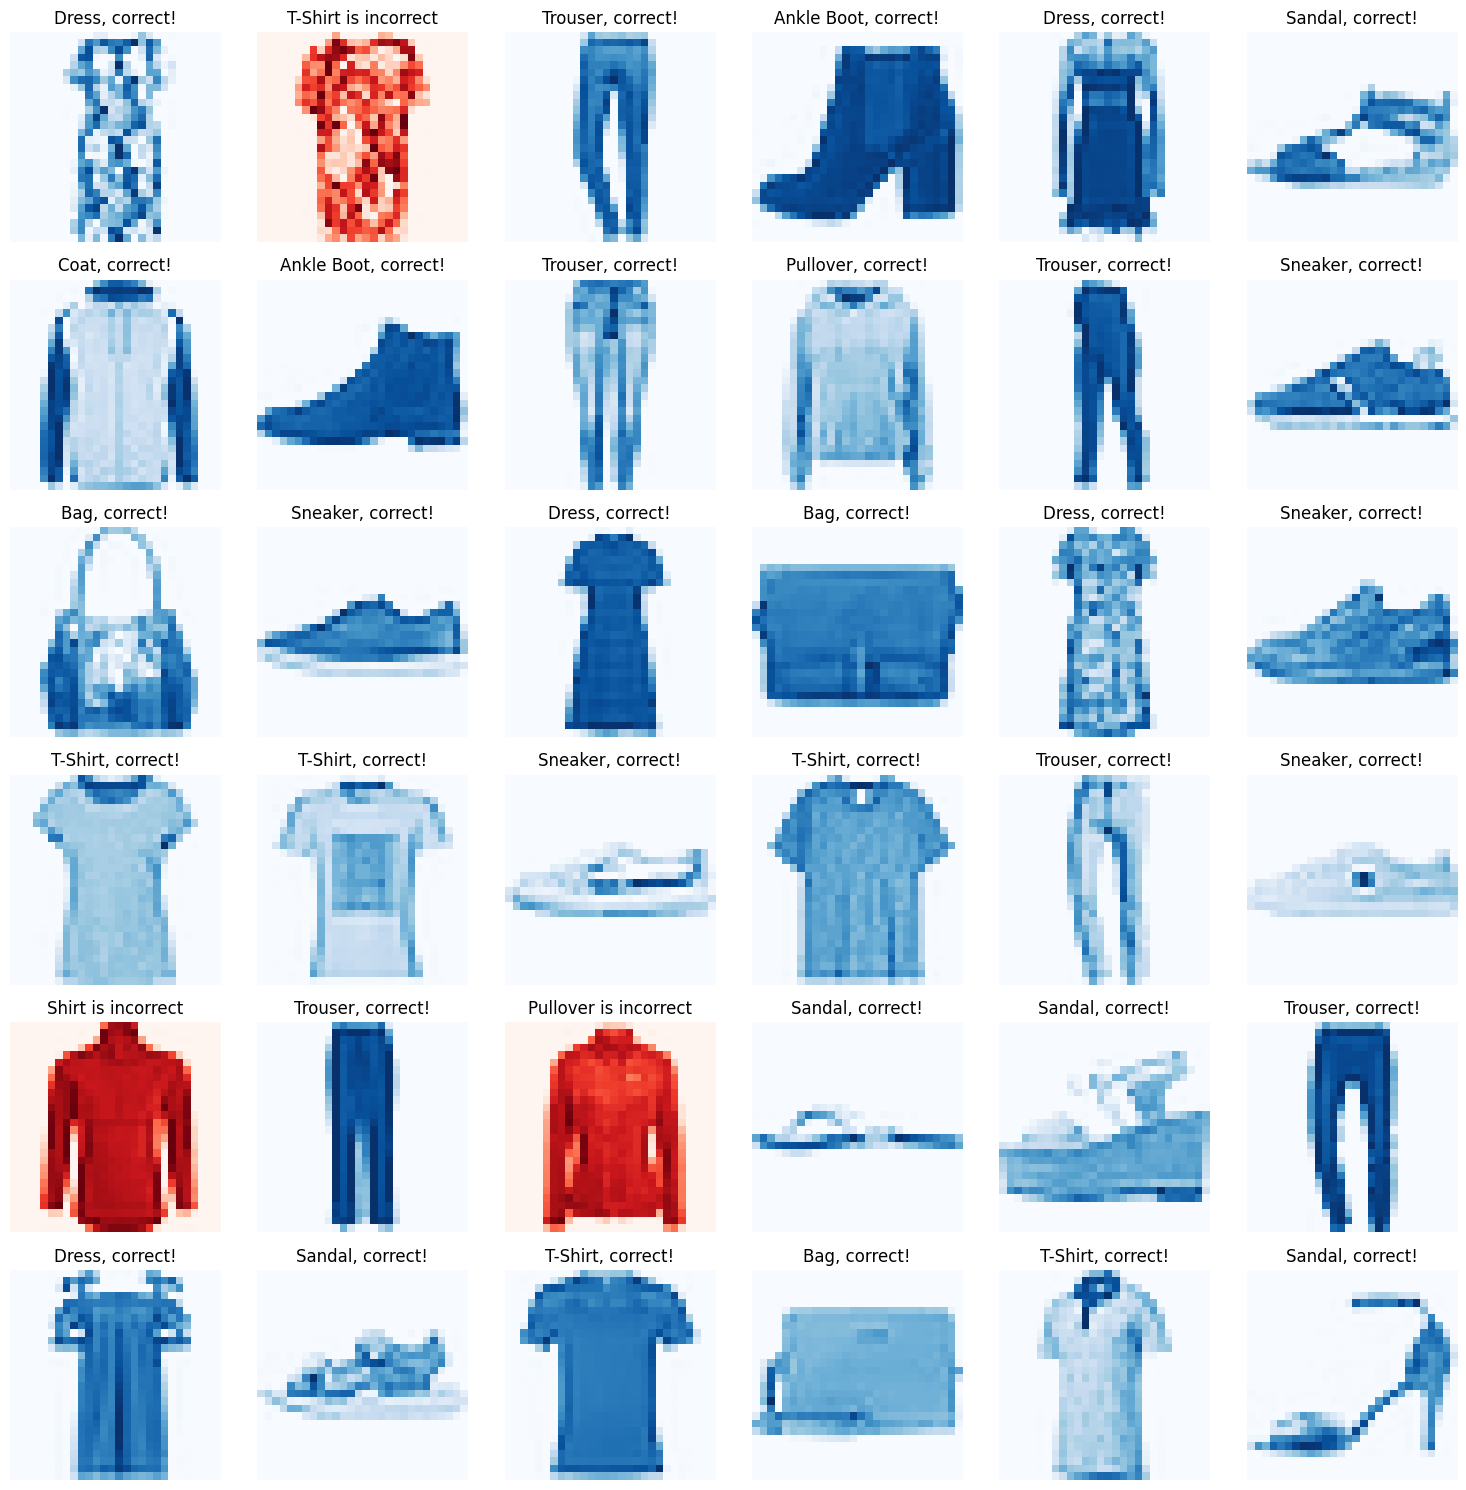

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# 레이블 태그 정의
label_tags = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

# 시각화 설정
columns = 6
rows = 6

fig = plt.figure(figsize=(15, 15))
model.eval()  # 모델 평가 모드 설정

for i in range(1, columns * rows + 1):
    # 데이터에서 랜덤 샘플 가져오기
    data_idx = np.random.randint(len(test_data))
    input_img, label = test_data[data_idx]

    # 입력 이미지를 모델에 전달
    input_img = input_img.unsqueeze(0).to(device)  # (1, 28, 28) -> (1, 1, 28, 28)
    with torch.no_grad():
        output = model(input_img)
        _, prediction = torch.max(output, 1)
        pred_class = label_tags[prediction.item()]
        true_class = label_tags[label]

    # 제목과 컬러맵 설정
    title = f"{pred_class}, correct!" if pred_class == true_class else f"{pred_class} is incorrect"
    cmap = "Blues" if pred_class == true_class else "Reds"

    # 이미지 시각화
    fig.add_subplot(rows, columns, i)
    plot_img = input_img.squeeze().cpu().numpy()  # (1, 28, 28) -> (28, 28)
    plt.imshow(plot_img, cmap=cmap)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()


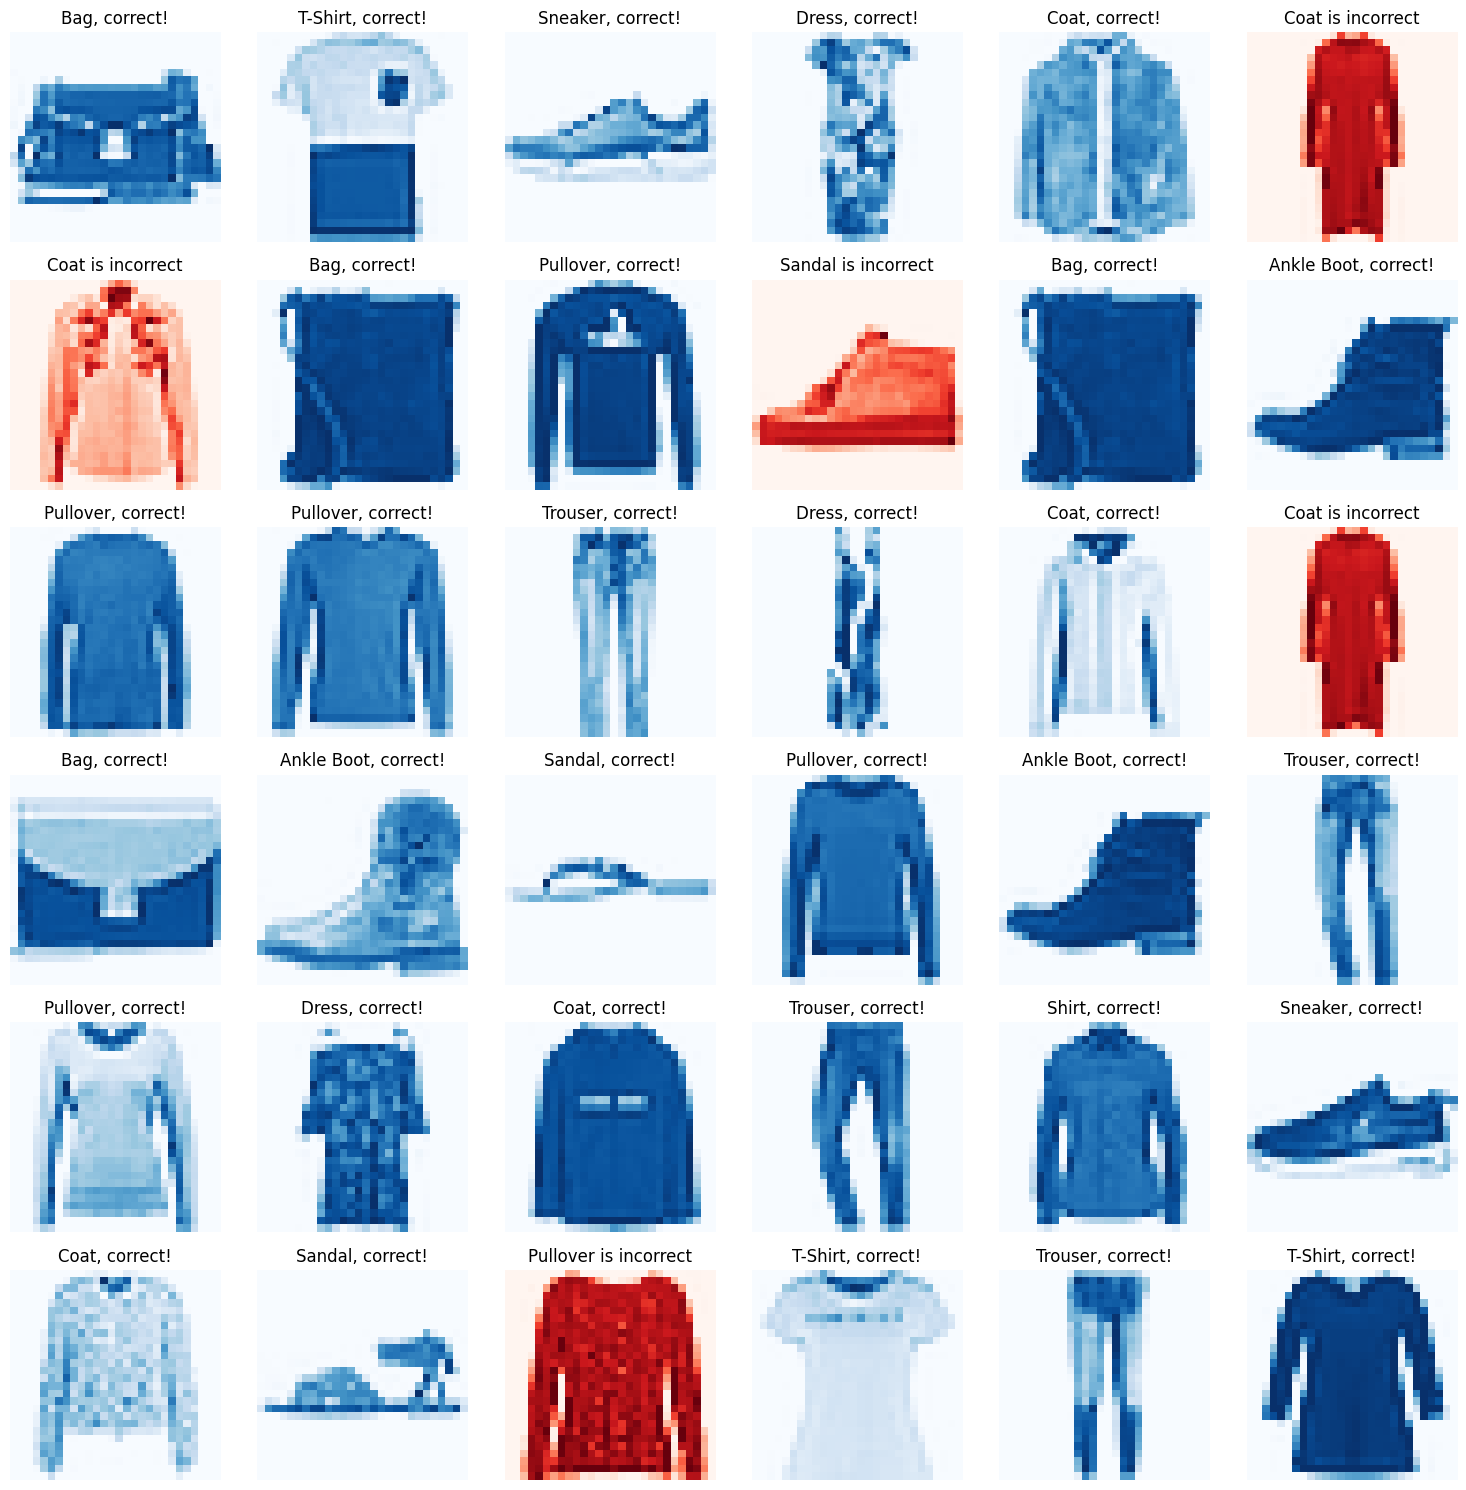

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

label_tags = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

columns = 6
rows = 6

fig = plt.figure(figsize=(15,15))
model.eval() # 모델을 평가모드로 변경

for i in range(1, columns * rows +1):
  data_idx = np.random.randint(len(test_dataloader))
  input_img = test_data[data_idx][0].to(device)
  label = test_data[data_idx][1]

  with torch.no_grad():
    output = model(input_img)
    _, prediction = torch.max(output, 1)
    pred_class = label_tags[prediction.item()]
    true_class = label_tags[label]

  title = f"{pred_class}, correct!" if pred_class == true_class else f"{pred_class} is incorrect"
  cmap = "Blues" if pred_class == true_class else "Reds"

  fig.add_subplot(rows, columns, i)
  plot_img = input_img.squeeze().cpu().numpy()
  plt.imshow(plot_img, cmap=cmap)
  plt.title(title)
  plt.axis("off")

plt.tight_layout()
plt.show()

### 실습5. CNN 구현

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 1. 데이터 입출력
# 데이터 전처리 (Normalization)
transform = transforms.Compose([transforms.RandomHorizontalFlip(), # 데이터 증강 : 이미지를 좌우 반전
                                transforms.RandomCrop(32, padding=4), # 32 x 32 -> 40 x 40 -> 32 x 32
                                transforms.ToTensor(), # 텐서로 변환
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # 정규화[(RGB평균), (RBG표준편차)]


# CIFAR-10 데이터 로드
# 10개의 클래스로 구성된 32*32 60000개 컬러 이미지
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True, num_workers=2)

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

# 2. 모델 정의
class SimpleCNN(nn.Module):
  def __init__(self):
    super().__init__()
    # conv 2번 / pooling 2번 / activation relu
    self.conv_layers = nn.Sequential(
      nn.Conv2d(3, 6, 5), # 32x32 -> 28x28x6
      nn.ReLU(),
      nn.MaxPool2d(2,2), # stride 28x28 -> 14x14
      nn.Conv2d(6, 16, 5), # 14 x 14 -> 10 x 10
      nn.ReLU(),
      nn.MaxPool2d(2,2), # 10 x 10 -> 5 x 5
    )
    self.flatten = nn.Flatten()
    self.fc_layer = nn.Sequential(
      nn.Linear(5*5*16, 120),
      nn.ReLU(),
      nn.Linear(120, 84),
      nn.ReLU(),
      nn.Linear(84, 10), # [1, 2, 0.2, 0.3 .....]
    )

  def forward(self, x):
    out = self.conv_layers(x)
    flatten = self.flatten(out)
    fc_out = self.fc_layer(flatten)
    return fc_out

device = "cuda" if torch.cuda.is_available() else "cpu"
model = SimpleCNN().to(device)

# 3. 손실함수 정의
loss_fn = nn.CrossEntropyLoss()

# 4. 가중치 학습
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

print("학습 완료")

# 테스트하기
correct = 0
total = len(test_loader.dataset)
with torch.no_grad(): # test는 기울기 계산 X
    for (images, labels) in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 2.3033972988128664
Epoch 2, Loss: 2.297904363632202
Epoch 3, Loss: 2.262538381099701
Epoch 4, Loss: 2.077468492269516
Epoch 5, Loss: 1.9477543959617614
Epoch 6, Loss: 1.8432589263916015
Epoch 7, Loss: 1.7725359470844269
Epoch 8, Loss: 1.7291415445804597
Epoch 9, Loss: 1.6982922048568725
Epoch 10, Loss: 1.6668359496593474
학습 완료
Accuracy: 39.87%


Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 1.8265
Epoch 2, Loss: 1.5502
Epoch 3, Loss: 1.4253
Epoch 4, Loss: 1.3626
Epoch 5, Loss: 1.3176
Epoch 6, Loss: 1.2690
Epoch 7, Loss: 1.2427
Epoch 8, Loss: 1.2063
Epoch 9, Loss: 1.1796
Epoch 10, Loss: 1.1556
학습 완료
테스트 정확도: 58.42%


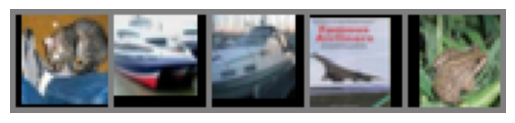

Predicted:  cat car ship ship frog


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# 데이터 전처리
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# CIFAR-10 데이터 로드
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True, num_workers=2)

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

# 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.flatten = nn.Flatten()
        self.fc_layer = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.flatten(x)
        x = self.fc_layer(x)
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"
model = SimpleCNN().to(device)

# 손실 함수 및 옵티마이저
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습
epochs = 10
for epoch in range(epochs):
    model.train()  # 학습 모드
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}")

print("학습 완료")

# 테스트
model.eval()  # 평가 모드
correct = 0
total = len(test_loader.dataset)
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"테스트 정확도: {accuracy:.2f}%")

# 시각화 함수
def imshow(img):
    img = img * 0.5 + 0.5  # 역정규화
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # (C, H, W) -> (H, W, C)
    plt.axis('off')
    plt.show()

def visualize_predictions(model, test_loader, num_images=5):
    dataiter = iter(test_loader)
    images, labels = next(dataiter)  # 첫 번째 배치 가져오기

    # 이미지 출력
    imshow(torchvision.utils.make_grid(images[:num_images]))

    # 모델 예측
    images = images.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.cpu().numpy()

    # 클래스 레이블
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # 예측 결과 출력
    print("Predicted: ", " ".join(classes[predicted[j]] for j in range(num_images)))

visualize_predictions(model, test_loader, num_images=5)
